
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [4]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [5]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [6]:
from sklearn.model_selection import cross_val_score

X = ha.drop('output', axis=1)
y_cp = ha['cp']

In [7]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_cv = cross_val_score(knn_model, X, y_cp, cv=5, scoring='accuracy')
knn_cv.mean()

np.float64(0.45090909090909087)

In [8]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_cv = cross_val_score(dt_model, X, y_cp, cv=5, scoring='accuracy')
dt_cv.mean()

np.float64(1.0)

In [9]:
lda_model = LinearDiscriminantAnalysis()
lda_cv = cross_val_score(lda_model, X, y_cp, cv=5, scoring='accuracy')
lda_cv.mean()

np.float64(0.4651178451178451)

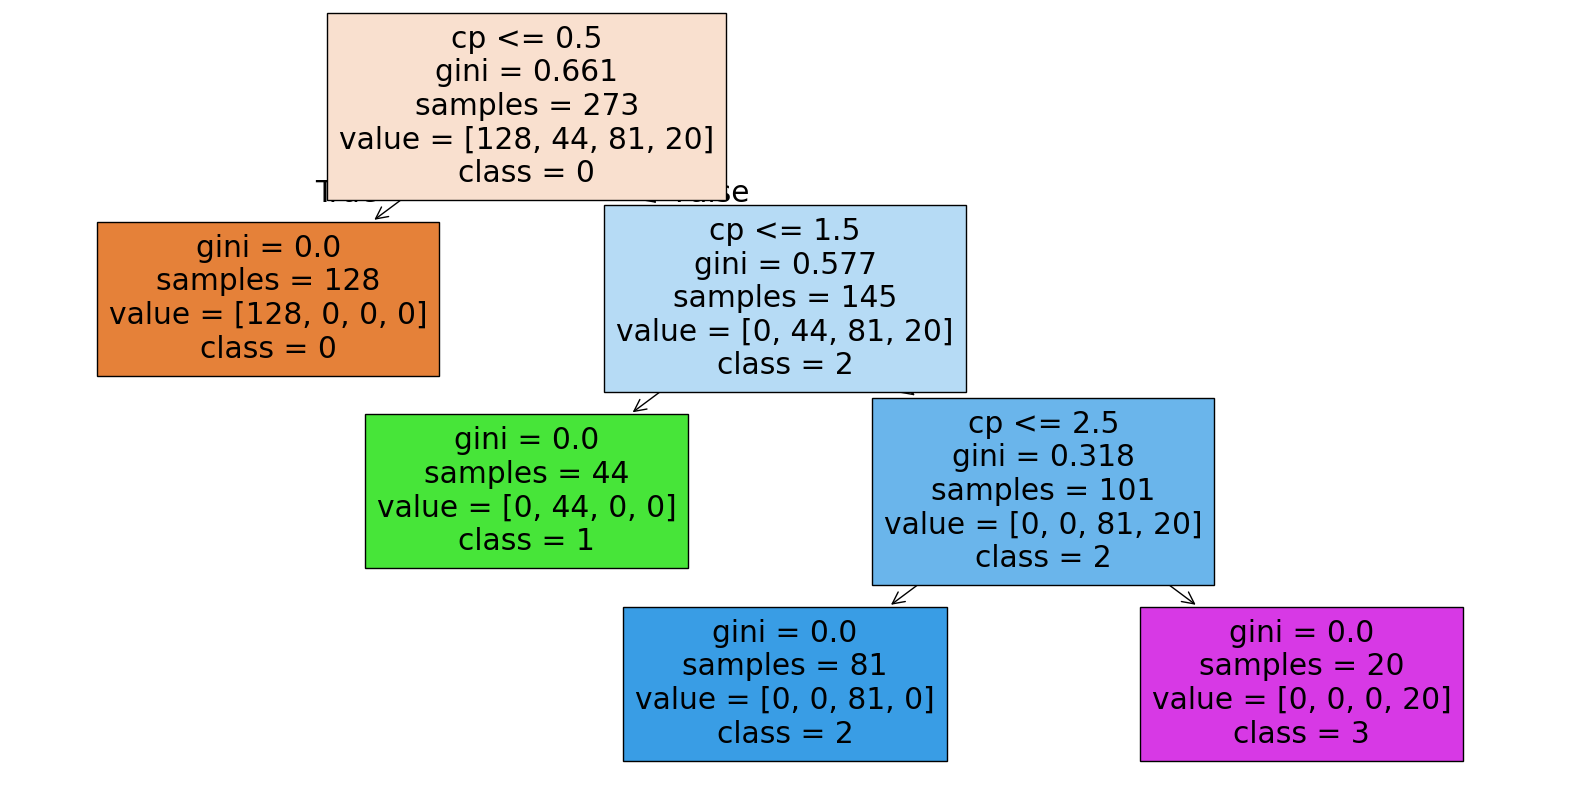

In [10]:
dt_model.fit(X, y_cp)
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['0', '1', '2', '3'], filled=True)
plt.show()

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = ha.drop('output', axis=1)
y = ha['cp']

f1_scores = []

for category in [0, 1, 2, 3]:
    y_binary = (y == category).astype(int)
    
    lr = LogisticRegression(max_iter=1000)
    cv_scores = cross_val_score(lr, X, y_binary, cv=5, scoring='f1')
    
    f1_scores.append((category, cv_scores.mean()))

f1_scores


[(0, np.float64(0.996078431372549)),
 (1, np.float64(0.0)),
 (2, np.float64(0.7434462759462759)),
 (3, np.float64(0.9333333333333333))]

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [12]:
from sklearn.model_selection import cross_val_score

X = ha.drop('output', axis=1)
y = ha['cp']

roc_scores = []

pairs = [(0, 1), (0, 2), (0, 3)]

for cat1, cat2 in pairs:
    mask = (y == cat1) | (y == cat2)
    X_subset = X[mask]
    y_subset = (y[mask] == cat2).astype(int)
    
    lr = LogisticRegression(max_iter=1000)
    cv_scores = cross_val_score(lr, X_subset, y_subset, cv=5, scoring='roc_auc')
    
    roc_scores.append(((cat1, cat2), cv_scores.mean()))

roc_scores


[((0, 1), np.float64(1.0)),
 ((0, 2), np.float64(1.0)),
 ((0, 3), np.float64(1.0))]